<a href="https://colab.research.google.com/github/tizwe/Image-restoration-via-a-DnGAN-and-DMSP/blob/main/Basic_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
By Tizian Weber 
Can be used and shared freely. 
"""

import matplotlib.pyplot as plt
import random 
import numpy as np 

# define centers of the classes
c1_1=[1.5,1.5]    #center 1 of class 1
c1_2=[0,-1]       #center 2 of class 1
c2=[1.2,0]        #center of class 2

# parameters
n_samples=1000
cluster1=[]
cluster2=[]
sigma=0.6


"""
Create instances of the classes.
Those are are normally distributed around their centers. 
In the third axes we save their class. 
--> (x1,x2,c)
"""
for i in range(n_samples):
  new_sample1=random.choice([c1_1,c1_2])+np.random.normal(size=2)*sigma
  new_sample1=np.append(new_sample1,0)

  new_sample2=c2+np.random.normal(size=2)*sigma
  new_sample2=np.append(new_sample2,1)

  cluster1.append(new_sample1)
  cluster2.append(new_sample2)

# concatenate data and shuffle
data=np.concatenate((cluster1,cluster2))
np.random.shuffle(data)



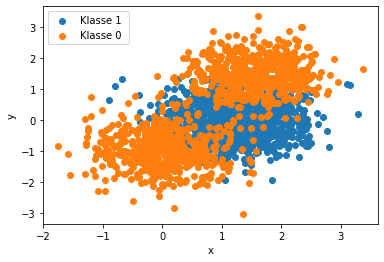

In [2]:
# visualization of the data 

plt.scatter(*zip(*np.array(cluster2)[:,0:2]),label='Klasse 1')
plt.scatter(*zip(*np.array(cluster1)[:,0:2]),label='Klasse 0 ')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [3]:
# Actiation functions and their derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_p(x):
    return 1-np.square(tanh(x))


#Training (1 Hidden-Layer)


In [35]:
hist=[]
def train(dta, lr):
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 3000
    learning_rate = lr
    data=dta
    costs = [] # keep costs during training, see if they go down
   
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)

        c=0
        global freq
        freq=50
        for p in data: 
            p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
            c += np.square(p_pred - p[2])
        hist.append(c)


        # calculate the cost over all data points every freq iterations
        if i % freq == 0:
            c = 0
            for p in data:
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b

In [36]:
#Training for different learn rates
a=train(data,0.03)
print('a fertig!')
b=train(data,0.3)
print('b fertig!')
c=train(data,1.5)
print('c fertig!')

a fertig!
b fertig!
c fertig!


#Training (2 Hidden-Layers)




In [44]:
def train(dta,lr):
    
    #random init of weights

    wscale=1 # Scale the starting weights
    w1 = np.random.randn()*wscale
    w2 = np.random.randn()*wscale
    v1 = np.random.randn()*wscale
    v2 = np.random.randn()*wscale
    b1 = np.random.randn()*wscale
    b2 = np.random.randn()*wscale
    b3 = np.random.randn()*wscale
    u1 = np.random.randn()*wscale
    u2 = np.random.randn()*wscale
    
    cost_hist = [] 

    iterations = 3000
    learning_rate = lr

    #Stochastic Gradient Descnet
    for i in range(iterations):
        # Take a random data point
        ri = np.random.randint(len(dta))
        point = dta[ri]

        hidden1 = point[0] * w1 + point[1] * w2 + b1 
        hidden2 = point[0] * v1 + point[1] * v2 + b2
        z=u1*tanh(hidden1)+u2*tanh(hidden2)+b3

        pred = sigmoid(z) # network prediction
        
        target = point[2]

        ###
        
        # Calculate and save the global loss over all points 
        # Not relevant for the training (can be commented out )
        # Makes up for the most of the training time !

        c=0
        global freq
        freq=50 # calculate the cost over all data points every freq iteratios
        if i%freq==0:
          for p in data: 
              p_pred = sigmoid( u1*tanh((w1 * p[0] + w2 * p[1] + b1)) + 
                                u2*tanh((v1 * p[0] + v2 * p[1] +b2 ))+b3)
              c += np.square(p_pred - p[2])
          cost_hist.append(c/data.shape[0])
          
        ###

        # Cost for the current point
        cost = np.square(pred - target)

        # Calculate the graient by using the chain rule

        dcost_dpred = 2*(pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_du1  = tanh(hidden1)
        dz_du2  = tanh(hidden2)
        dz_dhidden1  = u1*tanh_p(hidden1)
        dz_dhidden2  = u2*tanh_p(hidden2)
        dhidden1_dw1 = point[0]
        dhidden1_dw2 = point[1]
        dhidden2_dv1 = point[0]
        dhidden2_dv2 = point[1]
        dhidden1_db1 = 1
        dhidden2_db2 = 1
        dz_db3= 1

        dcost_dz = dcost_dpred * dpred_dz
        dcost_dw1 = dcost_dz * dz_dhidden1 *dhidden1_dw1 
        dcost_dw2 = dcost_dz * dz_dhidden1 *dhidden1_dw2
        dcost_db1 = dcost_dz * dz_dhidden1 *dhidden1_db1   
        dcost_dv1 = dcost_dz * dz_dhidden2 *dhidden2_dv1 
        dcost_dv2 = dcost_dz * dz_dhidden2 *dhidden2_dv2  
        dcost_db2 = dcost_dz * dz_dhidden2 *dhidden2_db2
        dcost_du1 = dcost_dz*  dz_du1
        dcost_du2 = dcost_dz*  dz_du2
        dcost_db3 = dcost_dz*  dz_db3


        #Update the parameters
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        v1 = v1 - learning_rate * dcost_dv1
        v2 = v2 - learning_rate * dcost_dv2
        b1 = b1 - learning_rate * dcost_db1
        b2 = b2 - learning_rate * dcost_db2
        b3 = b3 - learning_rate * dcost_db3
        u1 = u1 - learning_rate * dcost_du1
        u2 = u2 - learning_rate * dcost_du2
        
    # return cost and network parameters
    return cost_hist, w1, w2,v1,v2, b1,b2,b3,u1,u2

In [45]:
#Training for different learn rates
a=train(data,0.03)
print('a finished!')
b=train(data,0.3)
print('b finished!')
c=train(data,1.5)
print('c finished!')



a fertig!
b fertig!
c fertig!


# Results


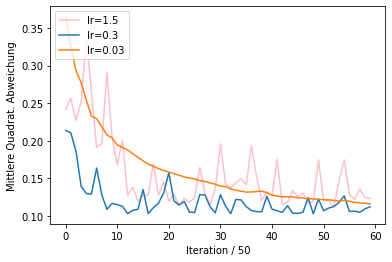

In [47]:
# Compare training history of different learn rates
# Due to the stochastic nature of our learning algorithm, this may vary.

plt.plot(c[0],label='lr=1.5',color='pink')
plt.plot(b[0],label='lr=0.3')
plt.plot(a[0],label='lr=0.03')
plt.legend(loc='upper left')
plt.xlabel('Iteration / '+str(freq))
plt.ylabel('Mittlere Quadrat. Abweichung')
plt.show()

# We will procced with 'b'

In [48]:
# Define the prediciton function 

def predc(p,param):
  if len(param)==10:   #Check whether 2-layer or 1-layer network was trained
    _, w1, w2,v1,v2, b1,b2,b3,u1,u2 = param
    return sigmoid( u1*tanh((w1 * p[0] + w2 * p[1] + b1)) + 
             u2*tanh((v1 * p[0] + v2 * p[1] +b2 ))+b3)
  elif len(param)==4:
    _, w1, w2, b = param
    return sigmoid(w1 * p[0] + w2 * p[1] + b)
  else:
    print('Please train a network first')

# Visualize the results

Light colored poitn have a value between 0.25 and 0.75
The network is uncertain about the true class of those points


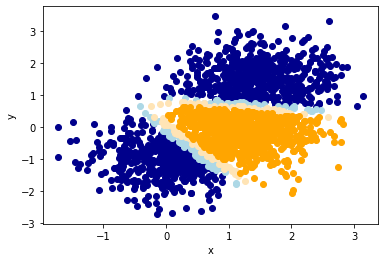

In [63]:
#The visulaziation was inspired by https://playground.tensorflow.org/
"""
For a given point, the network outputs a value in [0,1].
This value can be interpreted as the estimated propability that 
the point belong to class 1. 
e.g. network(p)= 0.8 ==> The network thinks that p belongs to class 1 to 80% 
The rounded value gives the predicted class. 
"""

cluster1=[]
cluster2=[]

print('Light colored poitn have a value between 0.25 and 0.75')
print('The network is uncertain about the true class of those points')


# Create new instances of the classes and predict their class
for i in range(int(n_samples)):
  new_sample1 =random.choice([c1_1,c1_2])+np.random.normal(size=2)*sigma
  prediction=np.floor(4*predc(new_sample1,b))
  new_sample1=np.append(new_sample1,prediction)

  new_sample2=c2+np.random.normal(size=2)*sigma
  prediction=np.floor(4*predc(new_sample2,b))
  new_sample2=np.append(new_sample2,prediction)

  cluster1.append(new_sample1)
  cluster2.append(new_sample2)

data1=np.concatenate((cluster1,cluster2))
np.random.shuffle(data1)
dta=[[],[],[],[]]
for d in data1: 
  dta[min(int(d[2]),3)].append(d[0:2])
try:
  plt.scatter(*zip(*np.array(dta[0])),c='darkblue')
except:
  pass
try:
  plt.scatter(*zip(*np.array(dta[1])),c='lightblue')
except:
  pass
try:
  plt.scatter(*zip(*np.array(dta[2])),c='moccasin')
except:
  pass
try:
  plt.scatter(*zip(*np.array(dta[3])),c='orange')
except:
  pass


plt.xlabel('x')
plt.ylabel('y')
plt.show()

Points in the blue zones are predicted as class 0 by the network;
those in the orange zone as class 1


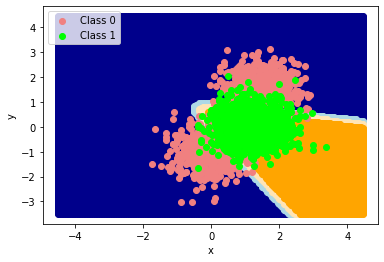

In [61]:
print('Points in the blue zones are predicted as class 0 by the network;')
print('those in the orange zone as class 1')

cluster1=[]
cluster2=[]
gt=[]
x = np.arange(-4.5, 4.5, 0.05)
y = np.arange(-3.5, 4.5, 0.05)
X,Y = np.meshgrid(x,y)
gt=np.array([X.flatten(),Y.flatten()]).T
for i in gt:
  prediction=np.floor(4*predc(i,b))
  new_sample1=np.append(i,prediction)
  cluster1.append(new_sample1)
data1=cluster1
np.random.shuffle(data1)
dta=[[],[],[],[]]
for d in data1: 
  dta[min(int(d[2]),3)].append(d[0:2])

plt.scatter(*zip(*np.array(dta[0])),c='darkblue')
plt.scatter(*zip(*np.array(dta[1])),c='lightblue')
plt.scatter(*zip(*np.array(dta[2])),c='moccasin')
plt.scatter(*zip(*np.array(dta[3])),c='orange')

cluster1=[]
cluster2=[]
for i in range(int(n_samples)):
  new_sample1 =random.choice([c1_1,c1_2])+np.random.normal(size=2)*sigma
  new_sample1=np.append(new_sample1,0)
  new_sample2=c2+np.random.normal(size=2)*sigma
  prediction=np.floor(4*predc(new_sample2,a))
  new_sample2=np.append(new_sample2,1)
  cluster1.append(new_sample1)
  cluster2.append(new_sample2)
data1=np.concatenate((cluster1,cluster2))
np.random.shuffle(data1)
dta=[[],[],[],[]]
for d in data1: 
  dta[min(int(d[2]),3)].append(d[0:2])

plt.scatter(*zip(*np.array(dta[0])),c='lightcoral',label='Class 0')
plt.scatter(*zip(*np.array(dta[1])),c='lime',label='Class 1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()



In [64]:
# Get the accuracy of the network

cor=0
flse=0
for q,n in zip(cluster1,range(1000)): 
  if np.round(q[2]/4) == 0:
    cor+=1
  else:
    flse+=1
for q in cluster2: 
  if np.round(q[2]/4) == 1:
    cor+=1
  else:
    flse+=1

print(cor/(cor+flse),'% of the network estimations were correct')


0.8095 % of the network estimations were correct
